In [15]:
## Importar librerías y extraer archivos
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [16]:
#Importar la base de datos de train, para su posterior análisis

entrena=pd.read_csv("train.csv")

In [17]:
entrena.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
list(entrena)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### La primer columna es el id del pasajero, La columna survived 0 es que murió y 1 que sobrevivió, SibSp indica que si tiene hermanos o esposa con el (ella); Parch indica si tiene papá o hermanos. Embark indica el puerto de embarcación. (Cherbourg, Queensland, Southampton)

In [19]:
entrena.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

- Relación entre género y probabilidad de supervivencia
- Relación entre nivel de boleto y supervivencia
- Relación entre iban acompañados y superv. 
- Relación entre edad y superv. 
- Puerto de embarque y superv.
- Nivel de boleto vs género
- Nivel de boleto vs edad
- Precio del boleto por clase y embarque

In [20]:
## Relación entre el nivel de boleto y superivencia
sp = entrena[["Survived", "Pclass"]]
primera = len(sp[sp["Pclass"]==1])
segunda = len(sp[sp["Pclass"]==2])
tercera = len(sp[sp["Pclass"]==3])

muertos = len(sp[sp["Survived"]==0])
vivos = len(sp[sp["Survived"]==1])
totales = len (sp["Pclass"])
print(muertos)
print(vivos)
print(totales)


549
342
891


In [7]:
print ("El promedio de muertos en primera es :", primera/totales*100)
print ("El promedio de muertos en segunda es:", segunda/totales*100)
print ("El promedio de muertos en tercera es: ", tercera/totales*100)

El promedio de muertos en primera es : 24.242424242424242
El promedio de muertos en segunda es: 20.65095398428732
El promedio de muertos en tercera es:  55.106621773288445


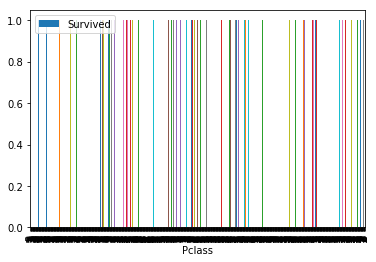

In [22]:
## Vamos a hacer una gráfica de barras para desplegar los datos

sp.plot.bar(x='Pclass',y='Survived')
plt.show()

- Esta gráfica no nos sirve, pues está marcando una línea por cada pasajero muerto; debemos agrupar por clase, para tener una mejor visión. 

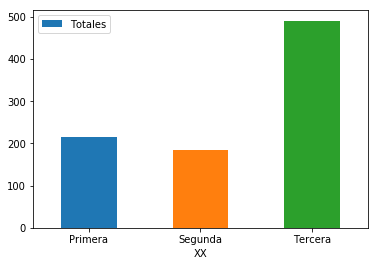

In [23]:
j=pd.DataFrame({'XX':['Primera', 'Segunda', 'Tercera'], 'Totales':[primera, segunda, tercera]})

j.plot.bar(x='XX',y='Totales',rot=0)
plt.show()


In [24]:
j.head()   # solamente para comprobar que j tiene los totales de cada clase

,XX,Totales
0,Primera,216
1,Segunda,184
2,Tercera,491


In [25]:
agrupados=entrena.groupby(["Pclass","Survived"])
agrupados.groups

{(1,
  0): Int64Index([  6,  27,  30,  34,  35,  54,  62,  64,  83,  92,  96, 102, 110,
             118, 124, 137, 139, 155, 168, 170, 174, 177, 185, 245, 252, 262,
             263, 270, 273, 284, 295, 297, 331, 332, 336, 339, 351, 373, 377,
             434, 438, 452, 456, 462, 467, 475, 487, 492, 493, 498, 505, 515,
             527, 536, 544, 545, 555, 557, 583, 602, 625, 633, 659, 662, 671,
             694, 698, 711, 741, 745, 748, 766, 782, 789, 793, 806, 815, 822,
             867, 872],
            dtype='int64'),
 (1, 1): Int64Index([  1,   3,  11,  23,  31,  52,  55,  61,  88,  97,
             ...
             842, 849, 853, 856, 857, 862, 871, 879, 887, 889],
            dtype='int64', length=136),
 (2,
  0): Int64Index([ 20,  33,  41,  70,  72,  99, 117, 120, 122, 134, 135, 144, 145,
             148, 149, 150, 178, 181, 191, 199, 213, 217, 219, 221, 228, 232,
             234, 236, 238, 239, 242, 249, 265, 277, 292, 308, 312, 314, 317,
             342, 343, 344, 357, 3

In [26]:
#Tomo el grupito de los ricos y que no se murieron :D 
Primera_Vivo=agrupados.get_group((1,1))
Primera_Muerto=agrupados.get_group((1,0))

#imprimo Primera_vivo - llamo al panda
agrupados.get_group((1,1))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C


In [28]:
# Bob construye tabla

Vivos= [len(agrupados.get_group((1,1))),len(agrupados.get_group((2,1))),len(agrupados.get_group((3,1)))]
Muertos=[len(agrupados.get_group((1,0))),len(agrupados.get_group((2,0))),len(agrupados.get_group((3,0)))]
index=['Primera','Segunda','Tercera']

CVM=pd.DataFrame({'Vivos': Vivos,'Muertos': Muertos}, index=index)

CVM

,Vivos,Muertos
Primera,136,80
Segunda,87,97
Tercera,119,372


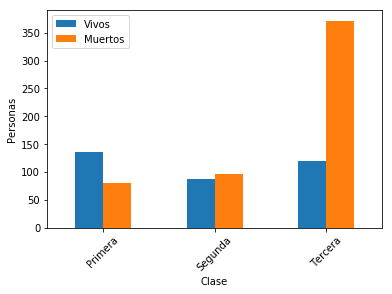

In [30]:
CVM.plot.bar(rot=45)  ## es el índice de rotación de la etiqueta
plt.xlabel('Clase')
plt.ylabel('Personas')
plt.show()

In [32]:
#Proporciones

#primera y se murió
pp1M=len(agrupados.get_group((1,0)))/primera
pp1V=len(agrupados.get_group((1,1)))/primera
pp3M=len(agrupados.get_group((3,0)))/tercera
pp3V=len(agrupados.get_group((3,1)))/tercera


print(pp1M,pp1V)
print(pp3M,pp3V)

0.37037037037037035 0.6296296296296297
0.7576374745417516 0.24236252545824846


In [64]:
## Edad y precio

entrena["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [65]:
entrena["Age"].unique()


array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

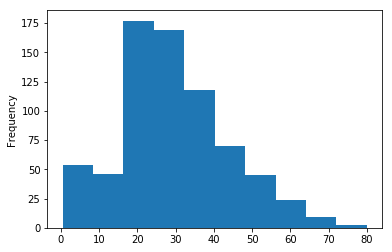

In [66]:
entrena["Age"].plot(kind="hist",bins=10)
plt.show()

In [67]:
AEdades=entrena.groupby("Survived")

In [68]:
AEdades.groups

{0: Int64Index([  0,   4,   5,   6,   7,  12,  13,  14,  16,  18,
             ...
             877, 878, 881, 882, 883, 884, 885, 886, 888, 890],
            dtype='int64', length=549),
 1: Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  17,  19,
             ...
             865, 866, 869, 871, 874, 875, 879, 880, 887, 889],
            dtype='int64', length=342)}

In [70]:
muertos=AEdades.get_group(0)
AEdades.get_group(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


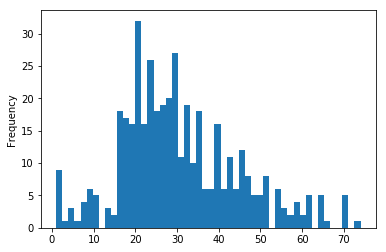

In [74]:
muertos["Age"].plot(kind="hist",bins=50)
plt.show()

In [75]:
muertos["Age"].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

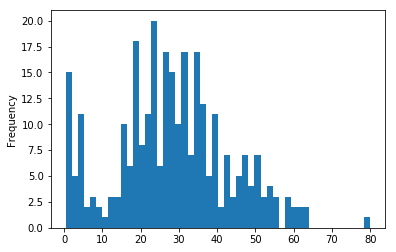

In [76]:
vivitos=AEdades.get_group(1)
#AEdades.get_group(0)
vivitos["Age"].plot(kind="hist",bins=50)
plt.show()

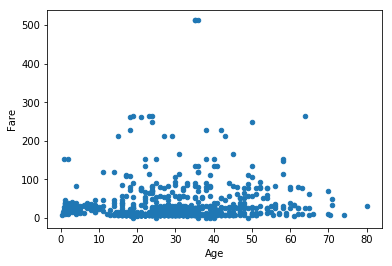

In [77]:
entrena.plot.scatter("Age","Fare")
plt.show()